In [1]:
#dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

#import OpenWeather API key
from api_keys import weather_api_key

#import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
#empty list for holding latitude and latitude coordinates
lat_lngs = []

#empty list for holding cities
cities = []

#range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

#create random latitude and longitude combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

#identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    #if the city is unique, then add it to cities list
    if city not in cities:
        cities.append(city)

#print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 598


## Plots to Showcase the Relationship Between Weather Variables and Latitude

In [3]:
#set the API base URL
url ="https://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

#define an empty list to fetch the weather data for each city
city_data = []

#print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

#create counters
record_count = 1
set_count = 1

#loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    #group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    #create endpoint URL with each city
    city_url = query_url + city
    
    #log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    #add 1 to the record count
    record_count += 1

    #run an API request for each of the cities
    try:
        #parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
    

        #parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        #append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    #if an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
#indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")   

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 2 of Set 1 | hithadhoo
Processing Record 3 of Set 1 | cayenne
Processing Record 4 of Set 1 | dikson
Processing Record 5 of Set 1 | castro
Processing Record 6 of Set 1 | nanortalik
Processing Record 7 of Set 1 | thompson
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | garni
Processing Record 10 of Set 1 | artyk
City not found. Skipping...
Processing Record 11 of Set 1 | alyangula
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | saint george
Processing Record 14 of Set 1 | hobart
Processing Record 15 of Set 1 | omboue
Processing Record 16 of Set 1 | shar
Processing Record 17 of Set 1 | cherskiy
Processing Record 18 of Set 1 | bad kissingen
Processing Record 19 of Set 1 | longyearbyen
Processing Record 20 of Set 1 | hilo
Processing Record 21 of Set 1 | iskateley
Processing Record 22 of Set 1 |

City not found. Skipping...
Processing Record 34 of Set 4 | yacuiba
Processing Record 35 of Set 4 | palabuhanratu
City not found. Skipping...
Processing Record 36 of Set 4 | saquarema
Processing Record 37 of Set 4 | andira
Processing Record 38 of Set 4 | porosozero
Processing Record 39 of Set 4 | erenhot
Processing Record 40 of Set 4 | acapulco
Processing Record 41 of Set 4 | alihe
Processing Record 42 of Set 4 | tiruchchendur
Processing Record 43 of Set 4 | dorado
Processing Record 44 of Set 4 | christchurch
Processing Record 45 of Set 4 | vila velha
Processing Record 46 of Set 4 | warqla
City not found. Skipping...
Processing Record 47 of Set 4 | visby
Processing Record 48 of Set 4 | hamburg
Processing Record 49 of Set 4 | kieta
Processing Record 0 of Set 5 | umea
Processing Record 1 of Set 5 | saint-philippe
Processing Record 2 of Set 5 | faanui
Processing Record 3 of Set 5 | tambopata
Processing Record 4 of Set 5 | broken hill
Processing Record 5 of Set 5 | emerald
Processing Recor

Processing Record 24 of Set 8 | faya
Processing Record 25 of Set 8 | hami
Processing Record 26 of Set 8 | alofi
Processing Record 27 of Set 8 | vuktyl
Processing Record 28 of Set 8 | lompoc
Processing Record 29 of Set 8 | carballo
Processing Record 30 of Set 8 | juneau
Processing Record 31 of Set 8 | kautokeino
Processing Record 32 of Set 8 | namibe
Processing Record 33 of Set 8 | chimbote
Processing Record 34 of Set 8 | hofn
Processing Record 35 of Set 8 | betsiamites
Processing Record 36 of Set 8 | grado
Processing Record 37 of Set 8 | bonthe
Processing Record 38 of Set 8 | bolobo
Processing Record 39 of Set 8 | guane
Processing Record 40 of Set 8 | shimabara
Processing Record 41 of Set 8 | puerto colombia
Processing Record 42 of Set 8 | chara
Processing Record 43 of Set 8 | dzaoudzi
Processing Record 44 of Set 8 | maridi
Processing Record 45 of Set 8 | grand forks
Processing Record 46 of Set 8 | paraiso
Processing Record 47 of Set 8 | paamiut
Processing Record 48 of Set 8 | chapais


Processing Record 14 of Set 12 | bull savanna
Processing Record 15 of Set 12 | san severo
Processing Record 16 of Set 12 | yarensk
Processing Record 17 of Set 12 | miranda
Processing Record 18 of Set 12 | myitkyina
Processing Record 19 of Set 12 | sungurlare
Processing Record 20 of Set 12 | tual
Processing Record 21 of Set 12 | lewisporte
Processing Record 22 of Set 12 | kismayo
Processing Record 23 of Set 12 | mareeba
Processing Record 24 of Set 12 | prince rupert
Processing Record 25 of Set 12 | ust-kamchatsk
City not found. Skipping...
Processing Record 26 of Set 12 | ternate
Processing Record 27 of Set 12 | milingimbi
City not found. Skipping...
Processing Record 28 of Set 12 | witrivier
City not found. Skipping...
Processing Record 29 of Set 12 | thunder bay
Processing Record 30 of Set 12 | grand bank
Processing Record 31 of Set 12 | san patricio
Processing Record 32 of Set 12 | ambodifototra
City not found. Skipping...
Processing Record 33 of Set 12 | andenes
Processing Record 34

In [4]:
#convert cities weather data into Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
#show record count
city_data_df.count()

City          545
Lat           545
Lng           545
Max Temp      545
Humidity      545
Cloudiness    545
Wind Speed    545
Country       545
Date          545
dtype: int64

In [5]:
#display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hithadhoo,-0.6000,73.0833,27.26,77,99,6.08,MV,1675115275
1,cayenne,4.9333,-52.3333,25.02,88,100,1.54,GF,1675115276
2,dikson,73.5069,80.5464,-28.38,92,100,1.59,RU,1675115276
3,castro,-24.7911,-50.0119,18.96,90,100,2.05,BR,1675115277
4,nanortalik,60.1432,-45.2371,-5.82,81,76,5.27,GL,1675115277


In [6]:
#export city data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
#read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

#display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hithadhoo,-0.6000,73.0833,27.26,77,99,6.08,MV,1675115275
1,cayenne,4.9333,-52.3333,25.02,88,100,1.54,GF,1675115276
2,dikson,73.5069,80.5464,-28.38,92,100,1.59,RU,1675115276
3,castro,-24.7911,-50.0119,18.96,90,100,2.05,BR,1675115277
4,nanortalik,60.1432,-45.2371,-5.82,81,76,5.27,GL,1675115277


## Latitude vs. Temperature Plots

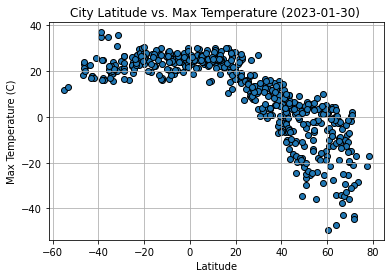

In [8]:
#build scatter plot
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
plt.scatter(x_values, y_values, linewidth=1, marker="o", edgecolors="black")
plt.title(f"City Latitude vs. Max Temperature (%s) " % time.strftime("%Y-%m-%d"))
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")

#incorporate other graph properties
plt.grid()
plt.savefig("output_data/Fig1.png")
plt.show()



## Latitude vs. Humidity

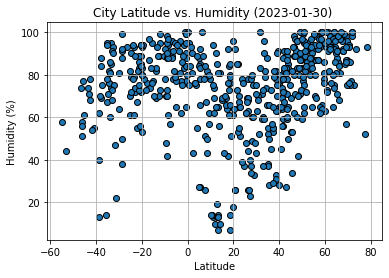

In [9]:
#build scatter plot
y_values = city_data_df["Humidity"]
plt.scatter(x_values, y_values, linewidth=1, marker="o", edgecolors="black")
plt.title(f"City Latitude vs. Humidity (%s) " % time.strftime("%Y-%m-%d"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

#incorporate other graph properties
plt.grid()
plt.savefig("output_data/Fig2.png")
plt.show()

## Latitude vs. Cloudiness

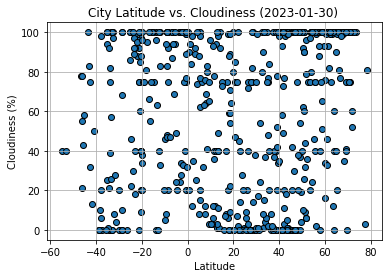

In [10]:
#build scatter plot
y_values = city_data_df["Cloudiness"]
plt.scatter(x_values, y_values, linewidth=1, marker="o", edgecolors="black")
plt.title(f"City Latitude vs. Cloudiness (%s) " % time.strftime("%Y-%m-%d"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

#incorporate other graph properties
plt.grid()
plt.savefig("output_data/Fig3.png")
plt.show()

## Latitude vs. Wind Speed

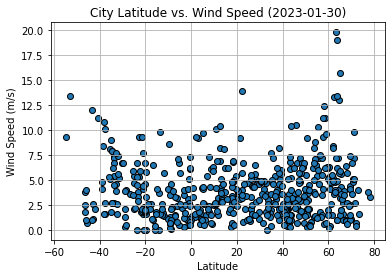

In [11]:
#build scatter plot
y_values = city_data_df["Wind Speed"]
plt.scatter(x_values, y_values, linewidth=1, marker="o", edgecolors="black")
plt.title(f"City Latitude vs. Wind Speed (%s)" % time.strftime("%Y-%m-%d"))
plt.ylabel("Wind Speed (m/s)")

plt.xlabel("Latitude")
#incorporate other graph properties
plt.grid()
plt.savefig("output_data/Fig4.png")
plt.show()

## Linear Regression for Each Relationship

In [12]:
#define a function to create Linear Regression plots
def regression_plots(x_values,y_values,title, y_label, line_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,line_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    print(f"The r-value is: {rvalue}")
    plt.show()


In [13]:
#create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,cayenne,4.9333,-52.3333,25.02,88,100,1.54,GF,1675115276
2,dikson,73.5069,80.5464,-28.38,92,100,1.59,RU,1675115276
4,nanortalik,60.1432,-45.2371,-5.82,81,76,5.27,GL,1675115277
5,thompson,55.7435,-97.8558,-23.91,70,40,7.20,CA,1675115277
7,garni,40.1221,44.7312,-3.63,65,98,2.55,AM,1675115278


In [14]:
#create a DataFrame with the Southern Hemisphere data (Latitude > 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hithadhoo,-0.6000,73.0833,27.26,77,99,6.08,MV,1675115275
3,castro,-24.7911,-50.0119,18.96,90,100,2.05,BR,1675115277
6,ushuaia,-54.8000,-68.3000,11.79,58,40,9.26,AR,1675115272
8,alyangula,-13.8483,136.4192,27.91,82,96,3.67,AU,1675115279
9,punta arenas,-53.1500,-70.9167,13.06,44,40,13.38,CL,1675115279


## Temperature vs. Latitude Linear Regression Plot (Northern & Southern Hemisphere)

The r-value is: -0.8198011908447199


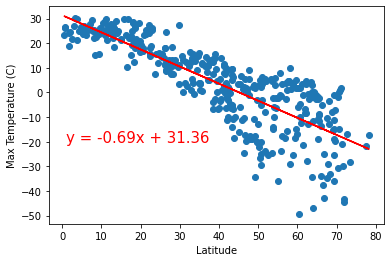

In [15]:
#linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
regression_plots(x_values,y_values,"Northern Hemisphere: Temperature vs. Latitude Linear Regression", 
                 "Max Temperature (C)", (1,-20))

The r-value is: 0.3177226847616341


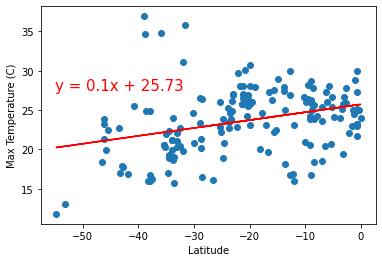

In [16]:
#linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
regression_plots(x_values,y_values,"Southern Hemisphere: Temperature vs. Latitude Linear Regression", 
                 "Max Temperature (C)", (-55, 27.5))

### Insights: Temperature vs. Latitude
- The linear plots show that there is correlation between temperature and distance to the equator. In both hemispheres, the farther a city is from the equator, the colder the temperature is. Also, the closer the cities are, the warmer the temperatures. 

## Humidity vs. Latitude Linear Regression Plot (Northern & Southern Hemisphere)

The r-value is: 0.46303020180585475


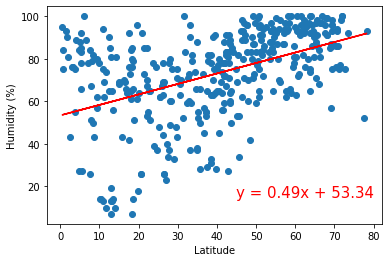

In [17]:
#northern hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
regression_plots(x_values,y_values,"Northern Hemisphere: Humidity vs. Latitude Linear Regression", 
                 "Humidity (%)", (45,15))

The r-value is: 0.4050668027782267


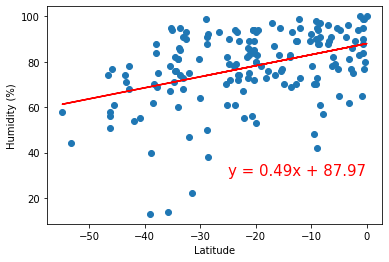

In [18]:
#southern hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
regression_plots(x_values,y_values,"Southern Hemisphere: Humidity vs. Latitude Linear Regression", 
                 "Humidity (%)", (-25, 30))

### Insights: Humidity vs. Latitude
- There is a positve, although weak, correlation between humidity and latitude. Cities of higher altitudes are more humid. 

## Cloudiness vs . Latitude Linear Regression Plot (Northern & Southern Hemisphere)

The r-value is: 0.30608262312674206


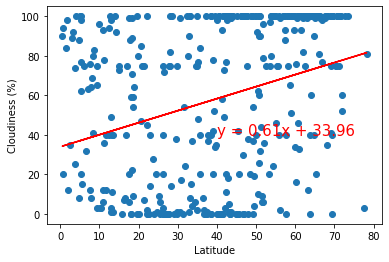

In [19]:
#northern hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
regression_plots(x_values,y_values,"Northern Hemisphere: Cloudiness vs. Latitude Linear Regression", 
                 "Cloudiness (%)", (40,40))

The r-value is: 0.28416479634907055


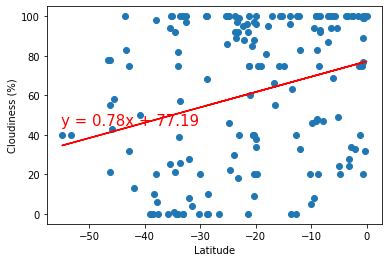

In [20]:
#southern hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
regression_plots(x_values,y_values,"Southern Hemisphere: Cloudiness vs. Latitude Linear Regression", 
                 "Cloudiness (%)", (-55, 45))

### Insights: Cloudiness vs. Latitude
- There is no correlation between cloudiness and latitude. Cities vary on cloudiness percentage no matter their location. 

## Wind Speed vs. Latitude Linear Regression Plot (Northern & Southern Hemisphere)

The r-value is: 0.13339731481353026


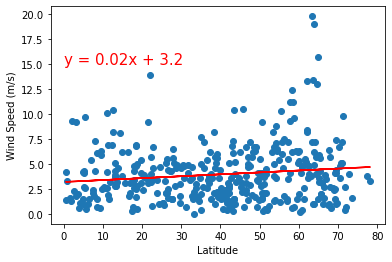

In [21]:
#northern hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
regression_plots(x_values,y_values,"Northern Hemisphere: Wind Speed vs. Latitude Linear Regression", 
                 "Wind Speed (m/s)", (0,15))

The r-value is: -0.3444349874008975


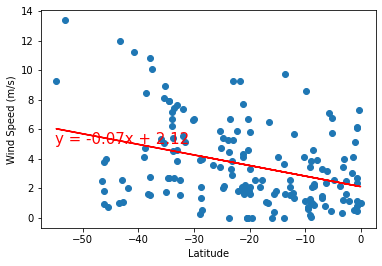

In [22]:
#southern hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
regression_plots(x_values,y_values,"Southern Hemisphere: Wind Speed vs. Latitude Linear Regression", 
                 "Wind Speed (m/s)", (-55, 5))

### Insights: Wind Speed vs. Latitude
- In the southern hemisphere, the wind speed slows down as citites approach the equator. Although, there is no pattern on wind speed and latitude. Overall, there is little to no correlation between wind speeds and latitude.